# Welcome to `carefree-creator`!

# Setup

## 1.0

In [1]:
!nvidia-smi

Tue Sep 13 11:03:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1.1 Change Python version

In [2]:
!sudo apt-get update -y
!sudo apt-get install python3.8

!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 2

!sudo apt-get install python3-pip
!python -m pip install --upgrade pip
!python --version

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,965 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,540 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]

## 1.2 Install Dependencies

In [3]:
!rm -rf carefree-*
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
!git clone https://github.com/carefree0910/carefree-learn.git
!git clone https://github.com/carefree0910/carefree-creator.git
!cd carefree-learn; pip3 install -e .[cv]
!cd carefree-creator; pip3 install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.8/1.8 GB 114.3 MB/s eta 0:00:01tcmalloc: large alloc 1837744128 bytes == 0x37ea000 @  0x7f692e4f31e7 0x4d3d40 0x4d3dcc 0x5d6bfc 0x51ef51 0x51f0db 0x4f768c 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x5d84f8 0x49d2ae 0x55eea0 0x5d85d1 0x49d74c 0x55eea0 0x5d85d1 0x49d2ae
tcmalloc: large alloc 2297184256 bytes == 0x71086000 @  0x7f692e4f4615 0x5d6bfc 0x51ef51 0x51f0db 0x4f768c 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1 0x49d2ae 0x5d84f8 0x49d2ae 0x55eea0 0x5d85d1 0x49d74c 0x55eea0 0x5d85d1 0x49d2ae 0x55eea0 0x5d85d1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.8/1.8 GB 125.3 MB/s eta 0:00:01tcmalloc: large alloc 

## 1.3 Download Pretrained Models

In [4]:
!python -c "import cflearn; cflearn.cv.DiffusionAPI.from_sd(); cflearn.cv.DiffusionAPI.from_inpainting()"

clip.large: 1.71GB [00:21, 80.0MB/s]
clip_3.8: 2.11MB [00:00, 12.2MB/s]                
kl.f8: 405MB [00:04, 83.2MB/s]               
ldm.sd: 4.27GB [00:41, 104MB/s]                
ldm_inpainting: 1.76GB [00:26, 66.0MB/s]               


# Launch the Server

## Use `nohup` to run the server in the background

In [5]:
!nohup uvicorn apis.interface:app --host 0.0.0.0 --port 8123 >& server.log &

## Test the server

Here, we should wait until this command returns {"msg":"Hello, carefree0910!"}. There are two handy ways to check whether the server is ready or not:
- You can open the resource monitor and look at the `GPU RAM` panel. When it goes up, the server is about to be ready.
- Another way to confirm is to check the generated `server.log` file. The server will be ready once it shows `Uvicorn running on http://0.0.0.0:8123`.

In [6]:
!curl -X POST -H "Content-Type: application/json" -d '{"name": "carefree0910"}' http://localhost:8123/demo/hello

{"msg":"Hello, carefree0910!"}

After the server is launched successfully, we can already call the APIs directly. For example, let's try out the `txt2img` API:

In [12]:
!curl -X POST -H "Content-Type: application/json" -d '{"text": "A fantasy landscape."}' http://localhost:8123/txt2img/sd -o test.out

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  446k  100  446k  100    32  30876      2  0:00:16  0:00:14  0:00:02 99690


The above request will send `A fantasy landscape.` prompt to the `img2txt` service, and the response (which contains some bytes of the generated image) will be saved to the `test.out` file. We can check it out with a few lines of code:

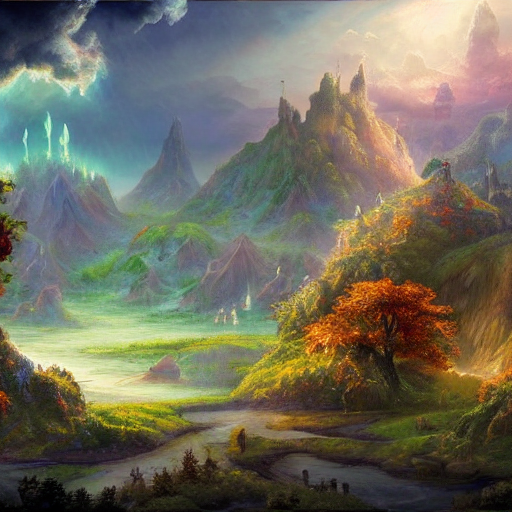

In [13]:
import io
from PIL import Image

with open("test.out", "rb") as f:
  image = Image.open(io.BytesIO(f.read()))

image

In fact, we can already play with `carefree-creator` in this way, and thanks to Google Colab, it is pretty visualizable!

# Launch the UI